In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
img_dc= plt.imread("dc_metro.png")

In [4]:
img_dc

array([[0.6039216 , 0.6431373 , 0.6784314 , ..., 0.59607846, 0.5921569 ,
        0.63529414],
       [0.6666667 , 0.654902  , 0.654902  , ..., 0.654902  , 0.64705884,
        0.6392157 ],
       [0.68235296, 0.6784314 , 0.6666667 , ..., 0.61960787, 0.57254905,
        0.5764706 ],
       ...,
       [0.14509805, 0.15294118, 0.16078432, ..., 0.1254902 , 0.1254902 ,
        0.1254902 ],
       [0.14117648, 0.15686275, 0.16470589, ..., 0.12156863, 0.1254902 ,
        0.12156863],
       [0.14117648, 0.15294118, 0.16470589, ..., 0.12156863, 0.1254902 ,
        0.12156863]], dtype=float32)

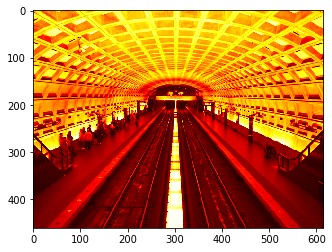

In [6]:
plt.imshow(img_dc, cmap=plt.cm.hot)
plt.show()

In [13]:
def smooth(img):
    avg_img =(    img[1:-1 ,1:-1]  # center
                + img[ :-2 ,1:-1]  # top
                + img[2:   ,1:-1]  # bottom
                + img[1:-1 , :-2]  # left
                + img[1:-1 ,2:  ]  # right
                ) / 5.0
    return avg_img


In [14]:
def smooth_loop(img):
    smoothed = np.zeros((img.shape[0]-2, img.shape[1]-2))
    for r in range(0, img.shape[0]-2):
        for c in range(0, img.shape[1]-2):
            smoothed[r, c] = (  img[r+1, c+1]  # center
                              + img[r  , c+1]  # top
                              + img[r+2, c+1]  # bottom
                              + img[r+1, c  ]  # left
                              + img[r+1, c+2]  # right
                             ) / 5.0
    return smoothed

In [15]:
img = plt.imread('dc_metro.png')
avg_img =smooth(img)

In [16]:
plt.figure()

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [17]:
plt.gray()

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'original')

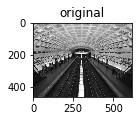

In [18]:
# Plot the original image first
plt.subplot(1,3,1)
plt.imshow(img)
plt.title('original')

Text(0.5, 1.0, 'smoothed once')

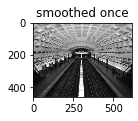

In [19]:
# Now the filtered image.
plt.subplot(1,3,2)
plt.imshow(avg_img)
plt.title('smoothed once')

Text(0.5, 1.0, 'difference')

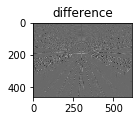

In [20]:
# And finally the difference between the two.
plt.subplot(1,3,3)
plt.imshow(img[1:-1,1:-1] - avg_img)
plt.title('difference')

In [21]:
# Bonus: Re-filter the image by passing the result image
#        through the filter again.  Do this 50 times and plot
#        the resulting image.

for num in range(50):
    avg_img = smooth(avg_img)

Text(0.5, 1.0, 'original')

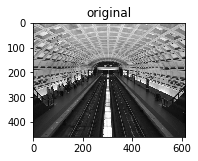

In [22]:
# Plot the original image first
plt.figure()
plt.subplot(1,2,1)
plt.imshow(img)
plt.title('original')

Text(0.5, 1.0, 'smoothed 50 times')

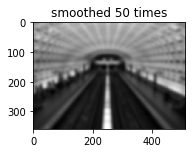

In [23]:
# Now the filtered image.
plt.subplot(1,2,2)
plt.imshow(avg_img)
plt.title('smoothed 50 times')

In [25]:
assert np.allclose(smooth(img), smooth_loop(img))
plt.show()